In [45]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py

%matplotlib inline

In [48]:
df=pd.read_excel(".\Data\Data_Train.xlsx")

In [49]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## EDA

In [50]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas_profiling as pf

In [52]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## EDA MANUAL

In [53]:
df.shape

(10683, 11)

In [54]:
df.dtypes #checking data types of variables

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [55]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [56]:
df.dropna(how='any',inplace=True)#Removing Nan values from dataset
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering

In [57]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [58]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [59]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [60]:
df.drop(['Date_of_Journey'],axis=1,inplace=True) #We now drop date_of_journey cp=olumn after extracting day and month data

In [61]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [62]:
#Like the date_of_journey  column formatting dep_time column
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [63]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [64]:
df.drop(['Dep_Time'],axis=1,inplace=True) #We now drop dep_time column after extracting hour and minute of departure

In [65]:
df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [66]:
#Like the date_of_journey  column formatting arrival_time column
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [67]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [68]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [72]:
duration=df['Duration'].str.split(' ',expand=True)
duration[1].fillna("00m",inplace=True) #fill empty minutes column
df['duration_hr']=duration[0].apply(lambda x:x[:-1])# Removing syllable h from hour column
df['duration_min']=duration[1].apply(lambda y:y[:-1])#Removing syllable m from minutes column

In [73]:
df.drop(['Duration'],axis=1,inplace=True) #Removing duration column
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [87]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

### Count of Airlines

In [88]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [89]:
#Price of airlines based on number of stops
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

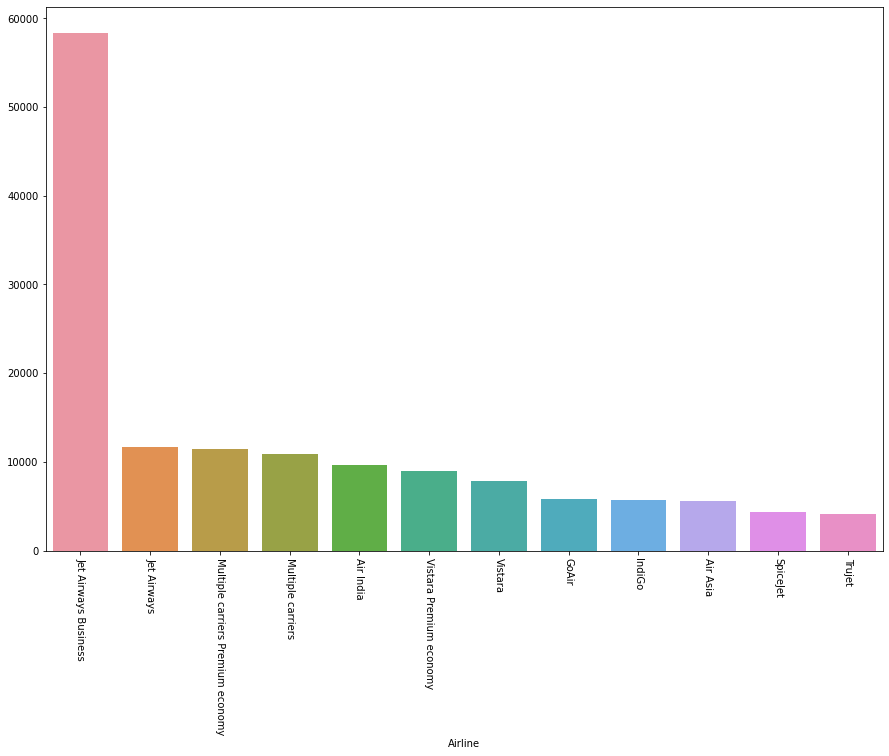

In [90]:
#Airline vs Price
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

<function matplotlib.pyplot.show(close=None, block=None)>

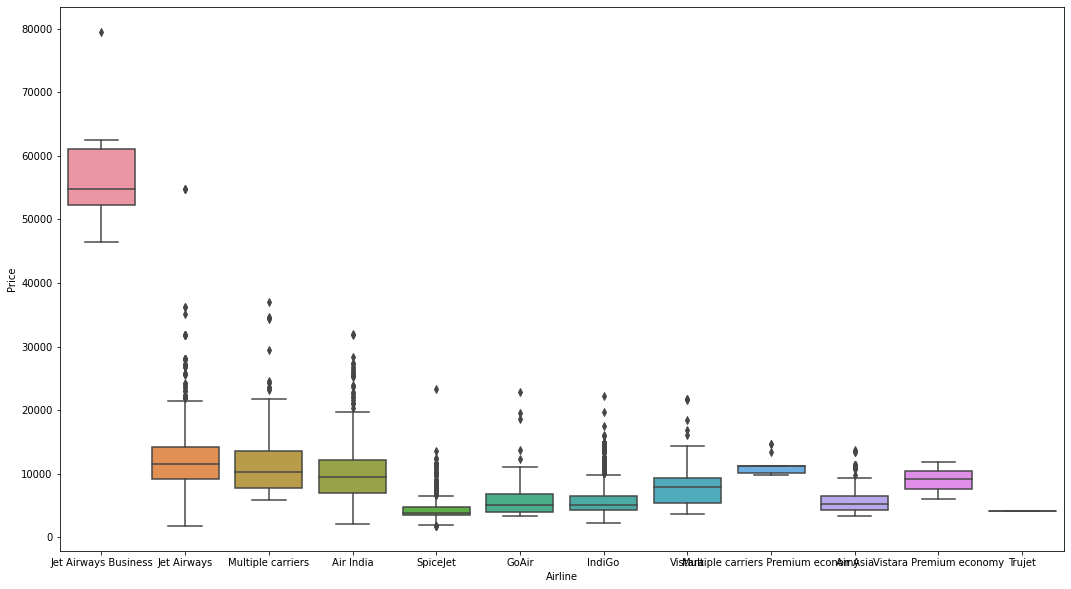

In [91]:

plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

In [92]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

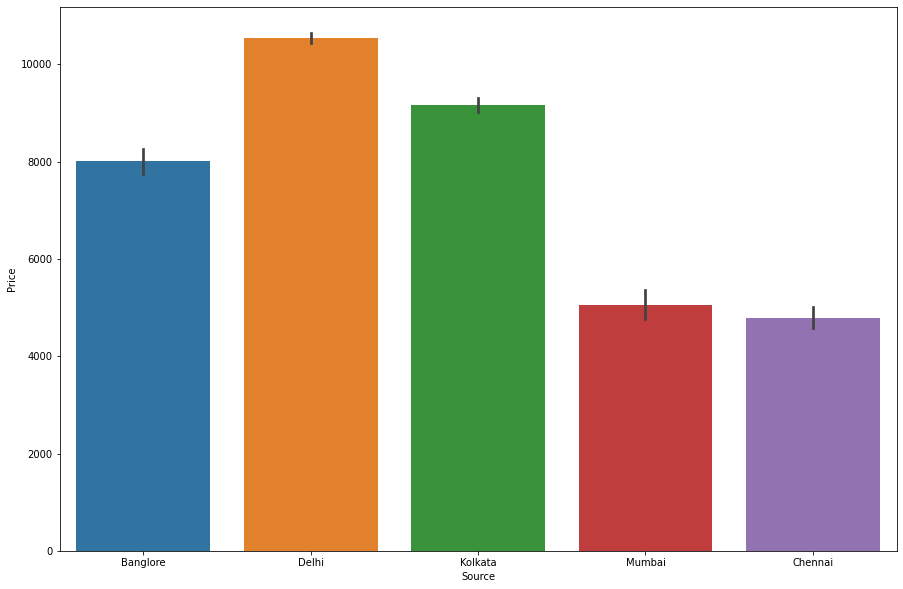

In [93]:
#Source vs Price
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

In [94]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [95]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [96]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

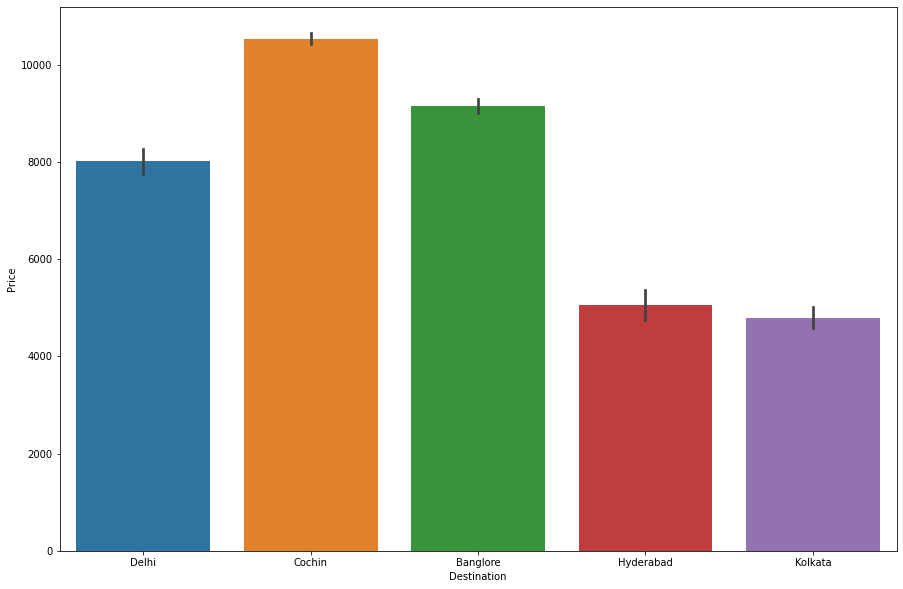

In [97]:
#Destination vs price
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

<AxesSubplot:>

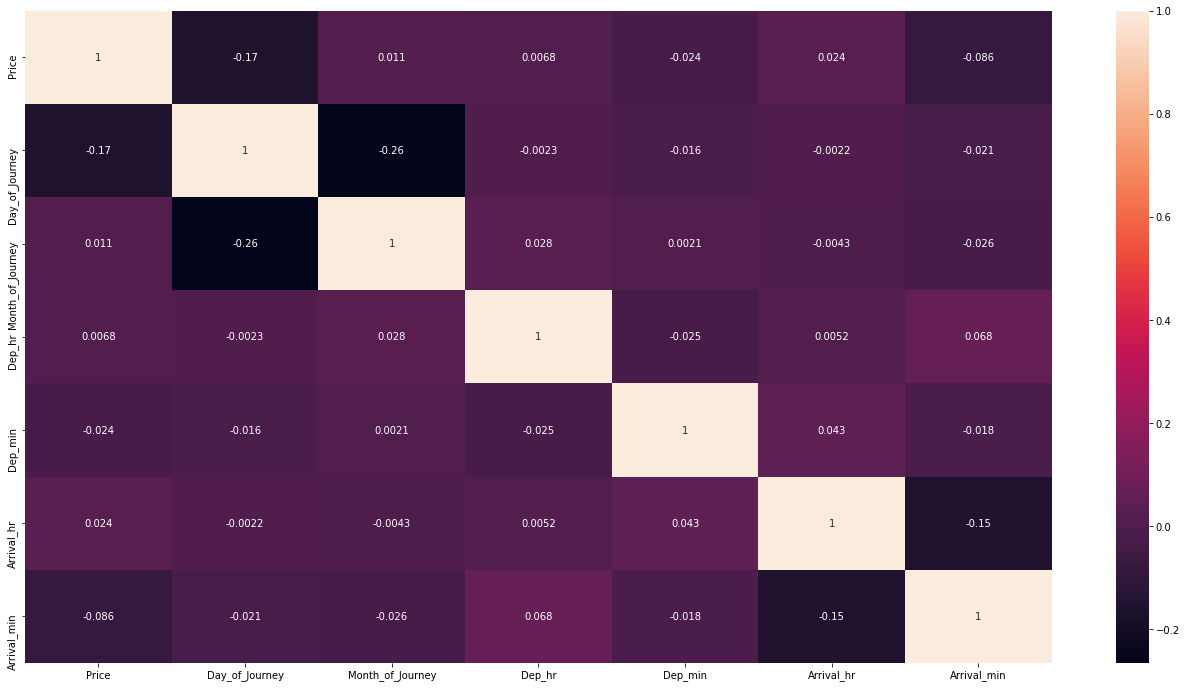

In [98]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

In [86]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


### One-hot encoding for categorical variables

In [99]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [100]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [101]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [102]:
df.shape

(10682, 31)

In [103]:
df_test=pd.read_excel(".\Data\Test_set.xlsx")

In [104]:

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [105]:
#Appling Same processing steps as that of training data
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [106]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [107]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [108]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [109]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [110]:
x.head(1)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50


## Model Building

In [111]:
#ExtraTrres Regressor
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

<AxesSubplot:>

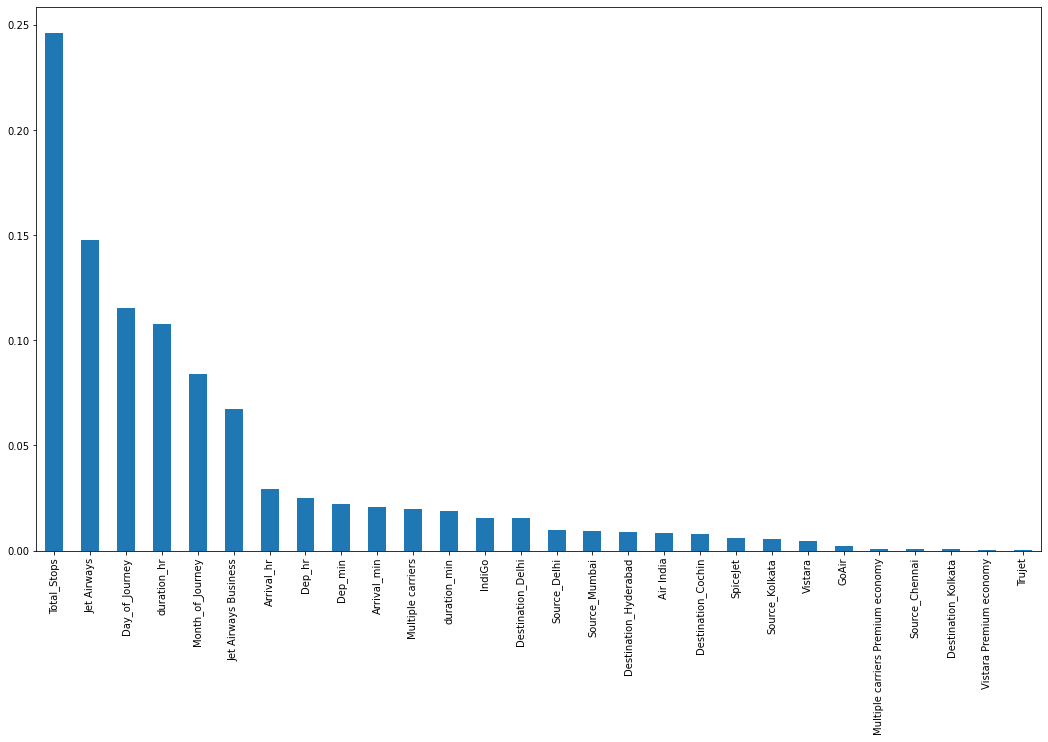

In [112]:
#Feature Importance
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [113]:
#Splitting dataset

#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [114]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7677772308812726

In [115]:

from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7941326581063204

## Hyperparameter Tuning

In [116]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [117]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [118]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12484.97522846,  4275.36666221,  6140.69436991, ...,
       11592.71064831,  9734.54097457,  8652.04384302])

In [119]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.2180015551812
MSE 3965987.6182705555


In [120]:
r2_score(y_test,rf_pred)

0.8068544702764853

In [121]:
pip install catboost

  Using cached catboost-0.26-cp37-none-win_amd64.whl (68.4 MB)
  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


In [122]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 54.6ms	remaining: 54.6s
1:	learn: 4319.1952920	total: 56.6ms	remaining: 28.2s
2:	learn: 4170.0874200	total: 58.6ms	remaining: 19.5s
3:	learn: 4033.1061207	total: 60.4ms	remaining: 15s
4:	learn: 3909.5332929	total: 62.1ms	remaining: 12.4s
5:	learn: 3788.8771850	total: 63.8ms	remaining: 10.6s
6:	learn: 3677.5795256	total: 65.6ms	remaining: 9.31s
7:	learn: 3585.9715553	total: 67.7ms	remaining: 8.39s
8:	learn: 3499.6424958	total: 69.5ms	remaining: 7.66s
9:	learn: 3408.9602975	total: 71.4ms	remaining: 7.07s
10:	learn: 3329.4018172	total: 73.8ms	remaining: 6.64s
11:	learn: 3258.4306577	total: 75.5ms	remaining: 6.21s
12:	learn: 3188.9732731	total: 77.2ms	remaining: 5.86s
13:	learn: 3126.6519374	total: 78.9ms	remaining: 5.56s
14:	learn: 3064.8092738	total: 80.6ms	remaining: 5.29s
15:	learn: 3011.9738031	total: 82.3ms	remaining: 5.06s
16:	learn: 2960.0953295	total: 84.3ms	remaining: 4.88s
17:	learn: 2917.5532184	total: 86.1ms	remaining:

154:	learn: 1962.1094228	total: 333ms	remaining: 1.81s
155:	learn: 1960.1052657	total: 335ms	remaining: 1.81s
156:	learn: 1957.7395675	total: 337ms	remaining: 1.81s
157:	learn: 1956.2192077	total: 339ms	remaining: 1.8s
158:	learn: 1953.8061817	total: 340ms	remaining: 1.8s
159:	learn: 1952.7697326	total: 343ms	remaining: 1.8s
160:	learn: 1951.1012882	total: 344ms	remaining: 1.79s
161:	learn: 1948.6492071	total: 346ms	remaining: 1.79s
162:	learn: 1945.1133182	total: 348ms	remaining: 1.79s
163:	learn: 1942.7228013	total: 350ms	remaining: 1.78s
164:	learn: 1940.9073624	total: 352ms	remaining: 1.78s
165:	learn: 1938.0460170	total: 354ms	remaining: 1.78s
166:	learn: 1935.3286398	total: 356ms	remaining: 1.77s
167:	learn: 1932.9545795	total: 358ms	remaining: 1.77s
168:	learn: 1931.6124443	total: 360ms	remaining: 1.77s
169:	learn: 1929.5307514	total: 362ms	remaining: 1.77s
170:	learn: 1927.4963218	total: 364ms	remaining: 1.76s
171:	learn: 1925.4669384	total: 366ms	remaining: 1.76s
172:	learn: 1

340:	learn: 1726.2547590	total: 669ms	remaining: 1.29s
341:	learn: 1724.9434243	total: 670ms	remaining: 1.29s
342:	learn: 1724.9309222	total: 672ms	remaining: 1.29s
343:	learn: 1723.3258449	total: 674ms	remaining: 1.28s
344:	learn: 1722.4287769	total: 676ms	remaining: 1.28s
345:	learn: 1721.3414872	total: 677ms	remaining: 1.28s
346:	learn: 1720.2014300	total: 679ms	remaining: 1.28s
347:	learn: 1719.6390060	total: 681ms	remaining: 1.27s
348:	learn: 1718.3140866	total: 683ms	remaining: 1.27s
349:	learn: 1717.3394270	total: 685ms	remaining: 1.27s
350:	learn: 1716.4750581	total: 687ms	remaining: 1.27s
351:	learn: 1714.7302070	total: 688ms	remaining: 1.27s
352:	learn: 1713.9624067	total: 690ms	remaining: 1.26s
353:	learn: 1711.8966387	total: 692ms	remaining: 1.26s
354:	learn: 1710.0600389	total: 693ms	remaining: 1.26s
355:	learn: 1709.4564664	total: 695ms	remaining: 1.26s
356:	learn: 1708.4228043	total: 697ms	remaining: 1.25s
357:	learn: 1707.3570736	total: 699ms	remaining: 1.25s
358:	learn

526:	learn: 1588.8468717	total: 1s	remaining: 900ms
527:	learn: 1588.8433189	total: 1s	remaining: 898ms
528:	learn: 1588.2166192	total: 1.01s	remaining: 896ms
529:	learn: 1587.6074543	total: 1.01s	remaining: 894ms
530:	learn: 1586.5424952	total: 1.01s	remaining: 892ms
531:	learn: 1586.5358638	total: 1.01s	remaining: 890ms
532:	learn: 1585.6948721	total: 1.01s	remaining: 888ms
533:	learn: 1585.2232425	total: 1.01s	remaining: 887ms
534:	learn: 1584.6888646	total: 1.02s	remaining: 885ms
535:	learn: 1583.5615763	total: 1.02s	remaining: 883ms
536:	learn: 1582.6483115	total: 1.02s	remaining: 881ms
537:	learn: 1582.0557037	total: 1.02s	remaining: 879ms
538:	learn: 1581.2143040	total: 1.02s	remaining: 877ms
539:	learn: 1580.4380867	total: 1.03s	remaining: 875ms
540:	learn: 1579.5303061	total: 1.03s	remaining: 873ms
541:	learn: 1578.8410565	total: 1.03s	remaining: 872ms
542:	learn: 1578.1809600	total: 1.03s	remaining: 870ms
543:	learn: 1577.7203095	total: 1.03s	remaining: 868ms
544:	learn: 1577

703:	learn: 1493.8836251	total: 1.33s	remaining: 560ms
704:	learn: 1493.3291796	total: 1.33s	remaining: 559ms
705:	learn: 1493.0720436	total: 1.34s	remaining: 557ms
706:	learn: 1492.2969504	total: 1.34s	remaining: 555ms
707:	learn: 1491.9967125	total: 1.34s	remaining: 553ms
708:	learn: 1491.6785699	total: 1.34s	remaining: 551ms
709:	learn: 1490.9308481	total: 1.34s	remaining: 549ms
710:	learn: 1490.7545667	total: 1.35s	remaining: 548ms
711:	learn: 1490.4655127	total: 1.35s	remaining: 546ms
712:	learn: 1490.1238831	total: 1.35s	remaining: 544ms
713:	learn: 1489.8331838	total: 1.35s	remaining: 542ms
714:	learn: 1489.4296741	total: 1.35s	remaining: 540ms
715:	learn: 1489.0651978	total: 1.36s	remaining: 538ms
716:	learn: 1488.7996804	total: 1.36s	remaining: 536ms
717:	learn: 1488.6740871	total: 1.36s	remaining: 534ms
718:	learn: 1488.2827462	total: 1.36s	remaining: 532ms
719:	learn: 1488.0238320	total: 1.36s	remaining: 530ms
720:	learn: 1487.3662632	total: 1.36s	remaining: 528ms
721:	learn

882:	learn: 1429.4896655	total: 1.67s	remaining: 221ms
883:	learn: 1429.1418463	total: 1.67s	remaining: 219ms
884:	learn: 1428.9533784	total: 1.67s	remaining: 217ms
885:	learn: 1428.9514875	total: 1.67s	remaining: 215ms
886:	learn: 1428.6645775	total: 1.67s	remaining: 213ms
887:	learn: 1428.1646398	total: 1.67s	remaining: 211ms
888:	learn: 1427.9469079	total: 1.68s	remaining: 209ms
889:	learn: 1427.6874155	total: 1.68s	remaining: 207ms
890:	learn: 1427.6841885	total: 1.68s	remaining: 206ms
891:	learn: 1427.4921877	total: 1.68s	remaining: 204ms
892:	learn: 1427.2610947	total: 1.68s	remaining: 202ms
893:	learn: 1426.7911065	total: 1.69s	remaining: 200ms
894:	learn: 1426.4899662	total: 1.69s	remaining: 198ms
895:	learn: 1426.3107111	total: 1.69s	remaining: 196ms
896:	learn: 1425.8850561	total: 1.69s	remaining: 194ms
897:	learn: 1425.5080254	total: 1.69s	remaining: 192ms
898:	learn: 1425.0569639	total: 1.7s	remaining: 190ms
899:	learn: 1424.5001044	total: 1.7s	remaining: 189ms
900:	learn: 

In [123]:
cat_pred=cat.predict(X_test)

In [124]:
r2_score(y_test,cat_pred)

0.8301928561140887

In [125]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [126]:

X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [127]:

from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [128]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [129]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [130]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

[04:29:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7360850618843358

In [131]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [132]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [133]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [134]:
deploy_df.to_csv('df_deployed')

In [136]:
#Use pickle to save our model so that we can use it later

#import pickle 
#pickle.dump(cat, open('model.pkl','wb'))
#model=pickle.load(open('model.pkl','rb'))